In [1]:
#Lendo um arquivo CSV (comma separated values)
import pandas as pd
import statsmodels.api as sm
dados=pd.read_csv('Publicidade-RLM.csv')
dados.head()

,ID,tv,radio,jornal,vendas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
# Fazendo a correlação entre as variáveis independentes (Xs) 

var=dados[['vendas','radio','jornal','tv']]

#DICA: colocar a variável DEPENDENTE (vendas) em primeiro lugar
#eu quero que minha correlação seja forte com o Y - vendas e não entre os Xs

corrvar=var.corr()
corrvar

,vendas,radio,jornal,tv
vendas,1.000000,0.576223,0.228299,0.782224
radio,0.576223,1.000000,0.354104,0.054809
jornal,0.228299,0.354104,1.000000,0.056648
tv,0.782224,0.054809,0.056648,1.000000


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.heatmap(corrvar)

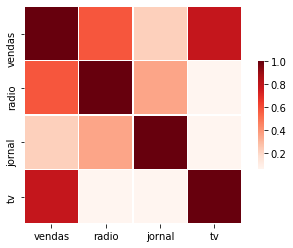

In [4]:
sns.heatmap(corrvar,square=True,linewidths=0.5,cbar_kws={'shrink':.5},cmap='Reds')

In [5]:
#acertando as variáveis
yobs=dados['vendas']
xobs=dados[['tv','radio']]
xobs=sm.add_constant(xobs)
resultado=sm.OLS(yobs,xobs).fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 04 Sep 2019   Prob (F-statistic):           4.83e-98
Time:                        10:50:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

C:\Users\Jeferson\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
# Modelo final
# vendas = 0.04*TV + 0.18*RADIO + 2.9211


In [7]:
# graficos 3d

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import seaborn as sns


fig = plt.figure(figsize=(7,5))
ax= fig.gca(projection='3d')
surf = ax.plot_trisurf(dados['tv'],dados['radio'],dados['vendas'],cmap=plt.cm.coolwarm)

fig.colorbar(surf,shrink=0.5,aspect=10)

ax.view_init(35,220)

ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Vendas')

clin = resultado.params[0]
cang1 = resultado.params[1]
cang2 = resultado.params[2]
r2aj = resultado.rsquared_adj
pvalor = resultado.f_pvalue

texto = "vendas = 

SyntaxError: EOL while scanning string literal (<ipython-input-7-5abf16f4a67d>, line 28)

Text(0, 0, 'vendas = 0.046 .0.188 .2.921 \n R2 = 0.90 \n Valor = 4.827E-98')

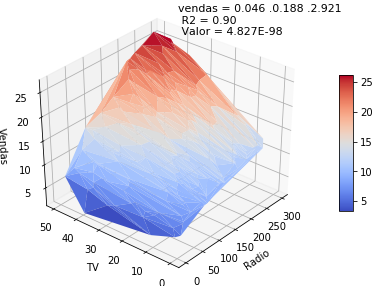

In [8]:
# graficos 3d

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import seaborn as sns


fig = plt.figure(figsize=(7,5))
ax= fig.gca(projection='3d')
surf = ax.plot_trisurf(dados['tv'],dados['radio'],dados['vendas'],cmap=plt.cm.coolwarm)

fig.colorbar(surf,shrink=0.5,aspect=10)

ax.view_init(35,220)

ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Vendas')

clin = resultado.params[0]
cang1 = resultado.params[1]
cang2 = resultado.params[2]
r2aj = resultado.rsquared_adj
pvalor = resultado.f_pvalue

texto = "vendas = {0:.3f} .{1:.3f} .{2:.3f} \n R2 = {3:.2f} \n Valor = {4:.3E}".format(cang1,cang2,clin,r2aj,pvalor)

ax.text(0,0,45,texto,fontsize=11)


0.3


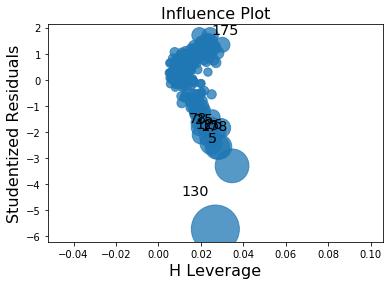

In [9]:
##Detecção de outliers e pontos influentes (Leverage)
from statsmodels.graphics.regressionplots import *
fig=influence_plot(resultado,alpha=0.05)
#y=a+bx
k=2 #número de variáveis independentes
n=20 #número de dados do dataframe
hc=2*(k+1)/n
print(hc)

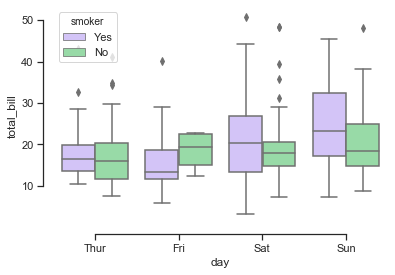

In [10]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)
